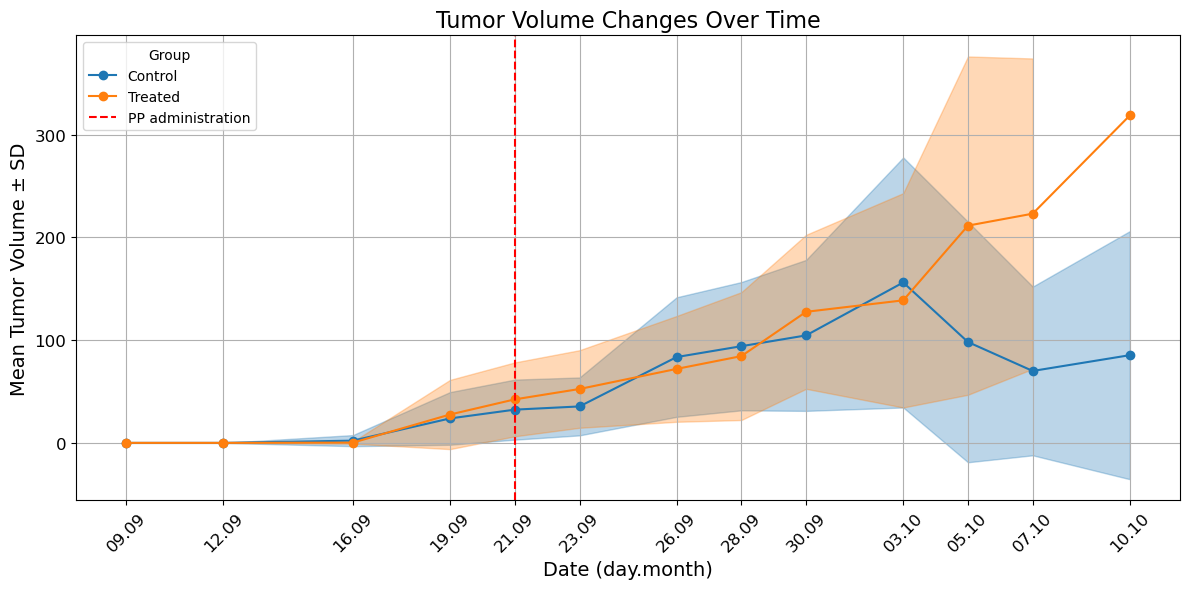

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = "V guza dniami .xlsx"
df = pd.read_excel(file_path, sheet_name="Arkusz1")

# Select tumor volume columns
value_columns = [col for col in df.columns if col.startswith("V guza")]

# Melt dataframe
df_melted = df.melt(id_vars=["Numer zwierzęcia", "Grupa"],
                    value_vars=value_columns,
                    var_name="Date",
                    value_name="Tumor Volume")

# Translate group names
df_melted["Group"] = df_melted["Grupa"].replace({
    "kontrolna": "Control",
    "badana": "Treated"
})

# Clean up dates
df_melted["Date"] = df_melted["Date"].str.replace("V guza ", "", regex=False)
df_melted["Date"] = pd.to_datetime(df_melted["Date"], dayfirst=True, errors="coerce")
df_melted = df_melted.dropna(subset=["Tumor Volume"])

# Group by date and group to calculate mean and std
summary = df_melted.groupby(["Date", "Group"])["Tumor Volume"].agg(['mean', 'std']).reset_index()

# Plot
plt.figure(figsize=(12, 6))

# Plot mean and SD manually
groups = summary["Group"].unique()
colors = sns.color_palette(n_colors=len(groups))

for i, group in enumerate(groups):
    group_data = summary[summary["Group"] == group]
    plt.plot(group_data["Date"], group_data["mean"], label=group, color=colors[i], marker='o')
    plt.fill_between(group_data["Date"],
                     group_data["mean"] - group_data["std"],
                     group_data["mean"] + group_data["std"],
                     alpha=0.3,
                     color=colors[i])

# Vertical line for treatment day
plt.axvline(pd.to_datetime("21.09.2022", dayfirst=True), color='red', linestyle='--', label="PP administration")

# Format x-axis
tick_dates = sorted(df_melted["Date"].dropna().unique())
plt.xticks(ticks=tick_dates, labels=[d.strftime("%d.%m") for d in tick_dates], rotation=45, fontsize=12)

plt.legend(title="Group", fontsize=14, title_fontsize=12)  # <-- większe napisy legendy
plt.yticks(fontsize=12)  # <-- większe ticki osi Y

# Labels and title
plt.title("Tumor Volume Changes Over Time", fontsize= 16)
plt.xlabel("Date (day.month)", fontsize=14)
plt.ylabel("Mean Tumor Volume ± SD", fontsize = 14)
plt.legend(title="Group")
plt.grid(True)
plt.tight_layout()
#plt.savefig("Tumor_Volume_Over_Time.png")
plt.show()